In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# sns.set_theme(style="darkgrid")
# sns.set(rc={'figure.figsize':(11.7,8.27)})
# get the color palette
sns.set_style("whitegrid")
palette = sns.color_palette()

In [3]:
sns.set_palette(palette)
palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
# print Working Directory
print(os.getcwd())

/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/analysing_data/chris_plots


In [5]:
# check the data for NaN values or other errors
df_all = pd.read_csv(f"../../data_save/all_data.csv")
# # data_save/all_data_map-len30.csv
# df_all = pd.read_csv(f"{root_directory}/data_save/all_data_map-len30.csv")


In [6]:
pd.options.display.max_columns = 500 # this will set limit of columns to 500

In [7]:
# check cwd if it plots
if 'analysing_data/plots' in os.getcwd():
    print("cwd is correct")

else:

    # moove to the plots folder
    #
    os.chdir("../../analysing_data/plots")
    print(os.getcwd())

cwd = os.getcwd()

/Users/cta/Documents/GitHub/Multi_Agents_Area_Exploration/analysing_data/plots


In [8]:
df_all.shape

(25342111, 40)

In [9]:
# drop all columns with NaN values
df_all = df_all.dropna(axis=1)
df_all.shape

(25342111, 28)

In [10]:
df_all['method'] = df_all['method'].astype('category')
df_all['method'] = df_all['method'].apply(lambda x: x.replace('_', ' ').title())

# remove all _ from the column names
df_all.columns = df_all.columns.str.replace('_', ' ')
# make all the columns tital like
df_all.columns = df_all.columns.str.title()



In [11]:
df_all.describe()


,Unnamed: 0,Area Percent,Update Time,Delta Time,Plan Length,Replan Count,Logging Time,Frame Count,Known Area,Total Distance Travelled,Seed,N Bots,Grid Thickness,Cols,Rows,Room Area,Min Room Size,Max Room Size,Wall Ratio,Experiment Id
count,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,2.534211e+07,25342111.0,25342111.0,25342111.0,25342111.0,2.534211e+07,25342111.0,2.534211e+07,2.534211e+07
mean,9.292248e+01,8.370077e-01,1.103849e-01,7.399697e+00,1.539867e+02,1.217252e+02,2.187371e-04,9.292248e+01,2.092519e+03,5.284630e+02,6.451129e+01,6.857582e+00,10.0,50.0,50.0,2500.0,1.070058e+01,20.0,1.778716e-01,9.479256e+04
std,8.945901e+01,2.093398e-01,1.546462e-01,6.289243e+00,1.017077e+02,1.076844e+02,1.462712e-03,8.945901e+01,5.233495e+02,4.323983e+02,8.622179e+00,3.183241e+00,0.0,0.0,0.0,0.0,6.548513e+00,0.0,7.523423e-02,5.789241e+04
min,0.000000e+00,6.440000e-02,0.000000e+00,1.000000e-02,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,1.610000e+02,2.000000e+00,5.000000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,0.000000e+00
25%,3.200000e+01,7.568000e-01,4.000000e-02,3.040000e+00,7.900000e+01,5.500000e+01,0.000000e+00,3.200000e+01,1.892000e+03,2.172376e+02,5.700000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,4.000000e+00,20.0,9.680000e-02,4.321400e+04
50%,7.000000e+01,9.316000e-01,6.000000e-02,6.060000e+00,1.250000e+02,9.600000e+01,0.000000e+00,7.000000e+01,2.329000e+03,4.234924e+02,6.500000e+01,4.000000e+00,10.0,50.0,50.0,2500.0,1.200000e+01,20.0,1.336000e-01,8.762500e+04
75%,1.280000e+02,9.924000e-01,1.300000e-01,1.012000e+01,2.070000e+02,1.550000e+02,0.000000e+00,1.280000e+02,2.481000e+03,7.211270e+02,7.200000e+01,8.000000e+00,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.624000e-01,1.445180e+05
max,2.499000e+03,1.000000e+00,4.960000e+00,2.631500e+02,1.282000e+03,4.838000e+03,1.000000e-02,2.499000e+03,2.500000e+03,6.943362e+03,7.900000e+01,1.200000e+01,10.0,50.0,50.0,2500.0,2.000000e+01,20.0,2.772000e-01,2.024990e+05


In [12]:
# conver columns to category that have less than 10 unique values
for col in df_all.columns:
    if df_all[col].nunique() < 20:
        df_all[col] = df_all[col].astype('category')

# print all the cols that are category
for col in df_all.columns:
    if df_all[col].dtype.name == 'category':
        print(col)
        


Logging Time
Success
Draw Sim
Log Plots
Use Threads
N Bots
Grid Thickness
Cols
Rows
Room Area
Min Room Size
Max Room Size
Method
Start Scenario
Goal Scenario
Loss Type


In [13]:
df_all.columns

Index(['Unnamed: 0', 'Area Percent', 'Update Time', 'Delta Time',
       'Plan Length', 'Replan Count', 'Logging Time', 'Frame Count',
       'Known Area', 'Total Distance Travelled', 'Success', 'Seed', 'Draw Sim',
       'Log Plots', 'Use Threads', 'N Bots', 'Grid Thickness', 'Cols', 'Rows',
       'Room Area', 'Min Room Size', 'Max Room Size', 'Wall Ratio', 'Method',
       'Start Scenario', 'Goal Scenario', 'Experiment Id', 'Loss Type'],
      dtype='object')

df_all

In [14]:
# df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))

# wost_case = df_all.groupby(['M']).max()[['Frame Count', 'Replan Count','Delta Time', 'Update Time']].sort_values(by='Frame Count')
# with open(f"worst_case.txt", 'w') as f:
#     f.write(wost_case.to_latex())
# wost_case

In [15]:
# # The average frame_count for each method
# df_all.groupby(['Method']).max()['Frame Count', 'Delta Time'].sort_values().apply(lambda x: ','+str(int(x))).to_frame()

In [34]:
df_all['M'] = df_all['Method'].apply(lambda x: ''.join([str(i[0]) for i in x.split(' ')]))

df_end = df_all.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])
# create an actanom column for the methods that takse the 1st letter of the method of each method



In [37]:
df_agent = df_all[df_all['Loss Type'] == 'Agent']
df_agent_end = df_agent.drop_duplicates(subset=['Experiment Id'], keep='last').sort_values(by=['Experiment Id'])

In [38]:
quality_metric = df_agent_end.groupby(['M']).mean()
quality_metric['Quality'] = quality_metric['Known Area'] / quality_metric['Total Distance Travelled']
# show quality and method
quality_metric = quality_metric.reset_index()[['M','Quality','Known Area','Total Distance Travelled']]
# method_group[['M','Quality']]
quality_metric = quality_metric.sort_values(by='Quality', ascending=False)
quality_metric.reset_index()

with open(f"success_metric.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(quality_metric.to_latex())
quality_metric

TypeError: 'Categorical' with dtype category does not support reduction 'mean'

## *****************************************************************

df_end

In [39]:
print('Success Count: ', df_end['Success'].value_counts()[True])
print('Fail Countsss: ', df_end['Success'].value_counts()[False])
print("Success rate is: ", df_end['Success'].value_counts()[True]/df_end['Success'].value_counts().sum(), "\n\n\n")


print(df_end[df_end['Success'] == False]['Loss Type'].value_counts())
print(df_end[df_end['Success'] == True]['Loss Type'].value_counts())
# print(df_end[df_end['Success'] == False]['Method'].value_counts())
# write in here how many total attempts for each strategy

Success Count:  173982
Fail Countsss:  28518
Success rate is:  0.8591703703703704 



Loss Type
Unrecoverable    28493
Disrepair           25
Agent                0
Name: count, dtype: int64
Loss Type
Agent            67500
Disrepair        67475
Unrecoverable    39007
Name: count, dtype: int64


## *****************************************************************

df_end

(0.0, 400.0)

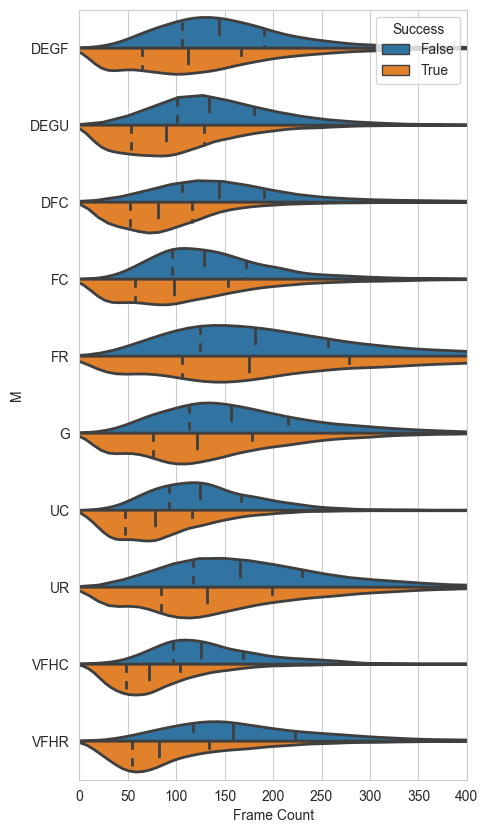

In [22]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.violinplot(y="M", x="Frame Count",hue="Success",
                data=df_end ,
                linewidth=2, split=True, inner="quartile",)
ax.set_xlim(0, 400)


## *****************************************************************

method_group

In [ ]:
# df_end['Success Ratio'] 
method_group = df_end.groupby(['M', 'Loss Type','Success',]).count()['Experiment Id'].unstack()
method_group['Success Ratio'] = method_group[True]/(method_group[True]+method_group[False])

method_group.reset_index(inplace=True)
method_group.drop(columns=[True, False], inplace=True)
# drop Success
# method_group.drop(columns=['Success'], inplace=True)
# stack up
method_group = method_group.set_index(['M',  'Loss Type']).stack().reset_index()
method_group.drop(columns=['Success'], inplace=True)
# rename the column 0 to Success Ratio
method_group.rename(columns={0:'Success Ratio'}, inplace=True)
method_group.set_index(['M',  'Loss Type'], inplace=True)

with open(f"loss_type.tex", 'w') as f:
    # f.write(df_end.groupby(['Loss Type', 'Method','Success']).count()['Experiment Id'].to_latex())
    # rotate the table 90 degrees so the index is now the columns
    f.write(method_group.to_latex())

method_group


/tmp/ipykernel_2616/2346326559.py:19: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  f.write(method_group.to_latex())


Success Ratio
M        Loss Type                   
D.E.G.F. Agent               1.000000
         Disrepair           1.000000
         Unrecoverable       0.559407
D.E.G.U. Agent               1.000000
         Disrepair           0.999407
         Unrecoverable       0.654667
D.F.C.   Agent               1.000000
         Disrepair           0.998963
         Unrecoverable       0.679852
F.C.     Agent               1.000000
         Disrepair           0.999852
         Unrecoverable       0.608148
F.R.     Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.322963
G.       Agent               1.000000
         Disrepair           0.999852
         Unrecoverable       0.499111
U.C.     Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.710519
U.R.     Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.425926
V.F.H.C. Agent               1.000000
         Disrepair           0.999556
         Unrecoverable       0.730519
V.F.H.R. Agent               1.000000
         Disrepair           1.000000
         Unrecoverable       0.587704

## *****************************************************************

method_group

/tmp/ipykernel_2616/3603383031.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_end[df_end['Loss Type'] == 'Unrecoverable'][['M', 'Success']][df_end['Success'] == False].value_counts().plot(kind='barh', figsize=(10, 10))


<AxesSubplot:ylabel='M,Success'>

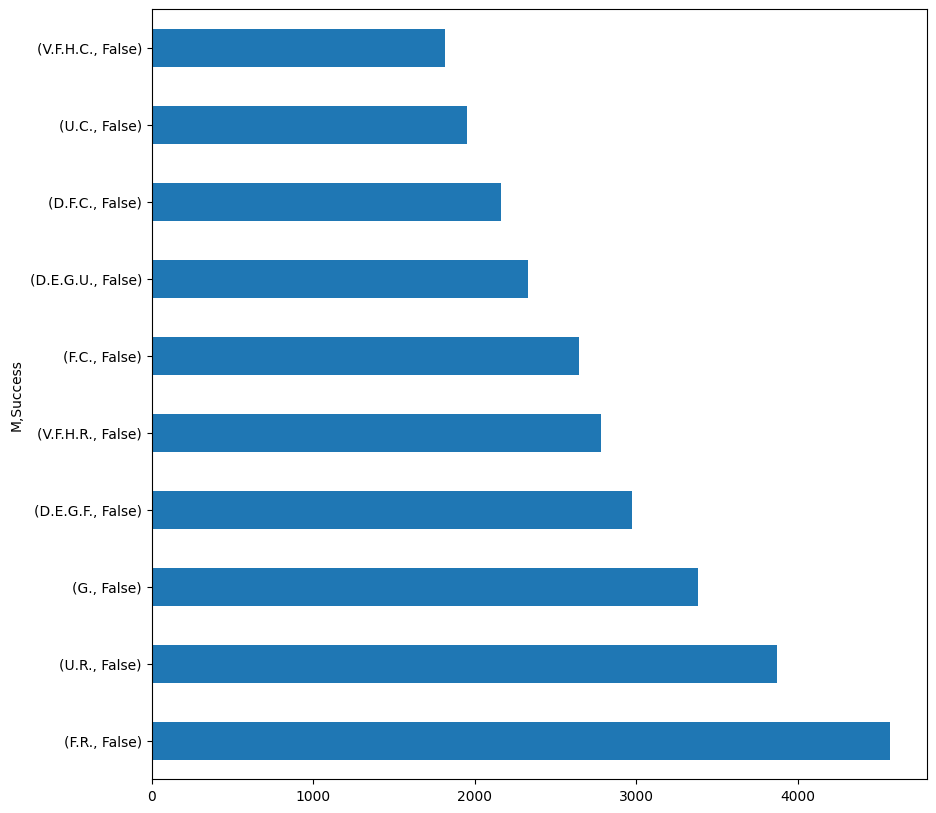

In [ ]:
df_end[df_end['Loss Type'] == 'Unrecoverable'][['M', 'Success']][df_end['Success'] == False].value_counts().plot(kind='barh', figsize=(10, 10))     
# df_end[df_end['M']=='U.R.']

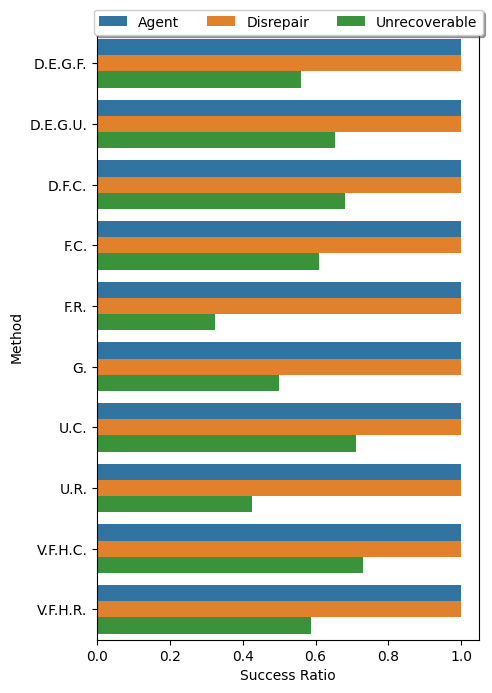

In [ ]:
# method_group
sns.barplot(y="M", x="Success Ratio", hue="Loss Type", data=method_group.reset_index())
# change the fig ratio
plt.gcf().set_size_inches(5, 7.)

# rename Y axis
plt.ylabel('Method')
# move the legend to the top center
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
# 

# save the whole figure dont cut the legend
plt.tight_layout()


plt.savefig(f"Success_Ratio.png", dpi=300)

In [85]:
df_end_success = df_end[df_end['Success'] == True]

with open(f"methods.tex", 'w') as f:
    # f.write(df_end_success[['Method', "M"]].drop_duplicates().reset_index(drop=True).to_latex())
    # sort alphabetically
    f.write(df_end_success[['Method', "M"]].drop_duplicates().sort_values(by='Method').reset_index(drop=True).to_latex())

In [ ]:
# sns.catplot(y="Frame Count", x="M", kind="box", data=df_end_success)
# plt.savefig(f"strategy_vs_iteration_count.png")

df_end_success

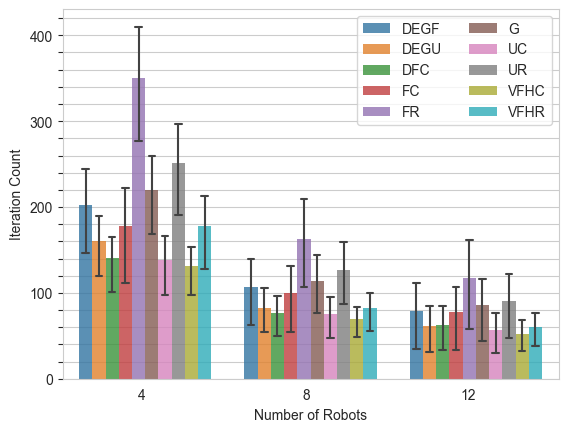

In [79]:
sns.set_style('whitegrid', rc={'ytick.left': True})

grd = sns.barplot(
    data=df_end_success,
    x="N Bots",
    y="Frame Count",
    hue = "M",
    
    errorbar=("pi", 50),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,

    # edgecolor=".5",
    alpha=.8,
)
grd.legend( ncol=2,)

grd.set_ylabel("Iteration Count")
grd.set_xlabel("Number of Robots")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')

plt.yticks(range(0, 440, 20))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.savefig(f"exploration_completion_time.png", bbox_inches='tight' ,dpi=300)

df_end_success

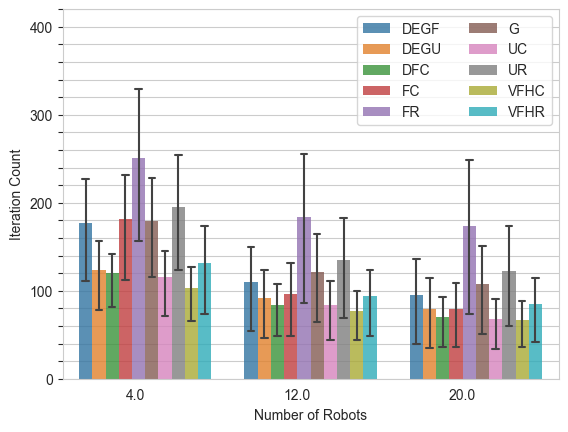

In [87]:
sns.set_style('whitegrid', 
              rc={'ytick.left': True})

grd = sns.barplot(
    data=df_end_success,
    x="Min Room Size",
    y="Frame Count",
    hue = "M",
    
    errorbar=("pi", 50),
    errwidth=1.5,
    capsize=.04,
    # errcolor=".4",
    linewidth=0,

    # edgecolor=".5",
    alpha=.8,
)


grd.set_ylabel("Iteration Count")
grd.set_xlabel("Number of Robots")
grd.set_xticklabels(grd.get_xticklabels(), horizontalalignment='right')
# plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
grd.legend( ncol=2,)


plt.yticks(range(0, 440, 20))
for ind, label in enumerate(grd.get_yticklabels()):
    if ind % 5 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
# plt.rcParams['ytick.major.size'] = 3
# plt.rcParams['ytick.major.width'] = 1
# plt.rcParams['ytick.left'] = True
plt.savefig(f"exploration_completion_time.png", bbox_inches='tight' ,dpi=300)

df_end_success

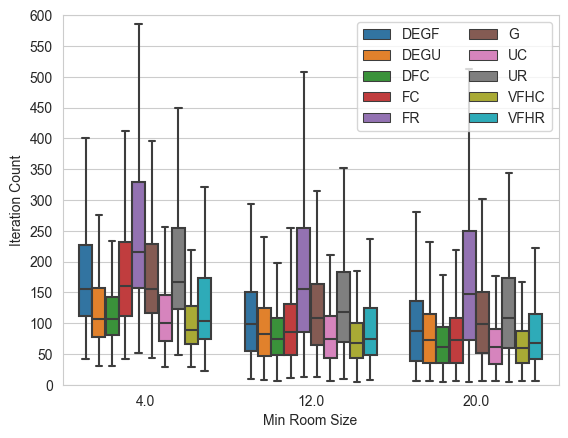

In [88]:
sns.set_style("whitegrid")
# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")

grd = sns.boxplot(
    data=df_end_success, 
    y="Frame Count", x="Min Room Size", hue="M", 
    showfliers=False,
)
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
# make the legonf in two columns
grd.legend( ncol=2,)


# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabel("Iteration Count")
grd.set_xlabel("Min Room Size")
grd.set(ylim=(0, 550))
# grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 620, 50))
# for ind, label in enumerate(grd.get_yticklabels()):
#     if ind % 5 == 0:  # every 10th label is kept
#         label.set_visible(True)
#     else:
#         label.set_visible(False)

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"room_density_vs_iteration_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

df_agent

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

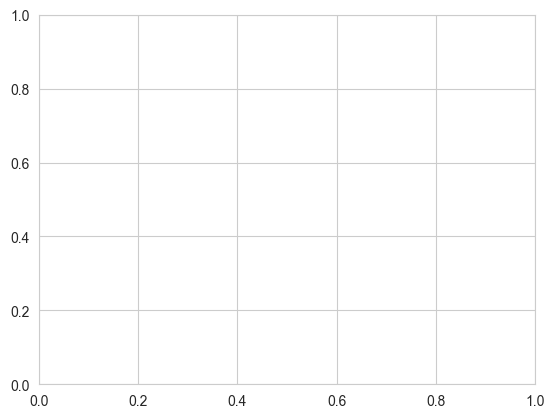

In [83]:
grd = sns.lineplot(data=df_agent, x = 'Frame Count',y = 'Replan Count', hue='M')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Strategies')
plt.xticks(range(0, 1000, 100))
plt.ylim(0, 500)
plt.ylim(0, 600)
plt.savefig(f"frame_count_vs_replan_count_hue_strategies.png", bbox_inches='tight' ,dpi=300)

df_agent

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

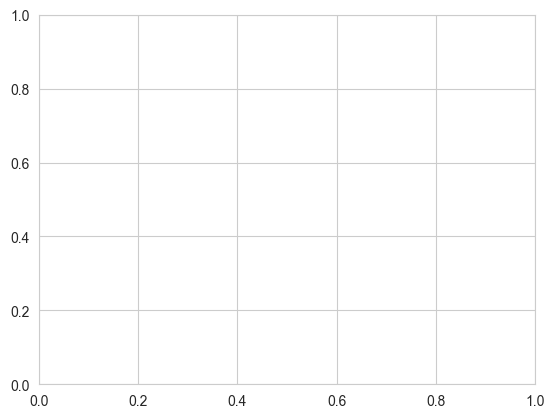

In [89]:
grd = sns.lineplot(data=df_agent, x = 'Frame Count',y = 'Replan Count', hue='Min Room Size')
# grd.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Room Density')
plt.xticks(range(0, 1000, 100))
plt.ylim(0, 400)
plt.savefig(f"frame_count_vs_replan_count_hue_density.png", bbox_inches='tight' ,dpi=300)

In [ ]:
# sns.boxplot(y="M", x="Frame Count",hue="Loss Type", data=df_end_success)

In [ ]:
# sns.boxenplot( y="M",x="Frame Count",hue="Goal Scenario",
#                 data=df_end_success ,
#                 )

In [ ]:
# sns.boxenplot(y="M",x="Frame Count",hue="Start Scenario",
#               data=df_end_success)

In [ ]:
df_end_success['Goal Scenario'].unique()

['goal-Rand_Start', 'goal-Edge_Start', 'goal-Top_Left_Start', 'goal-Center_Start', 'goal-Distributed_Start']
Categories (5, object): ['goal-Center_Start', 'goal-Distributed_Start', 'goal-Edge_Start', 'goal-Rand_Start', 'goal-Top_Left_Start']

In [ ]:
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Edge_Start'], 'Edges of Map')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Rand_Start'], 'Random Location')
df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Top_Left_Start'], 'Top Left Corner')


/tmp/ipykernel_2616/3802547872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Center_Start'], 'Center of Map')
/tmp/ipykernel_2616/3802547872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_end_success['Goal Scenario'] = df_end_success['Goal Scenario'].replace(['goal-Distributed_Start'], 'Equal Spread')
/tmp/ipykernel_2616/3802547872.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [ ]:
df_end_success['Goal Scenario'].unique()

['Random Location', 'Edges of Map', 'Top Left Corner', 'Center of Map', 'Equal Spread']
Categories (5, object): ['Center of Map', 'Equal Spread', 'Edges of Map', 'Random Location', 'Top Left Corner']

df_end_success

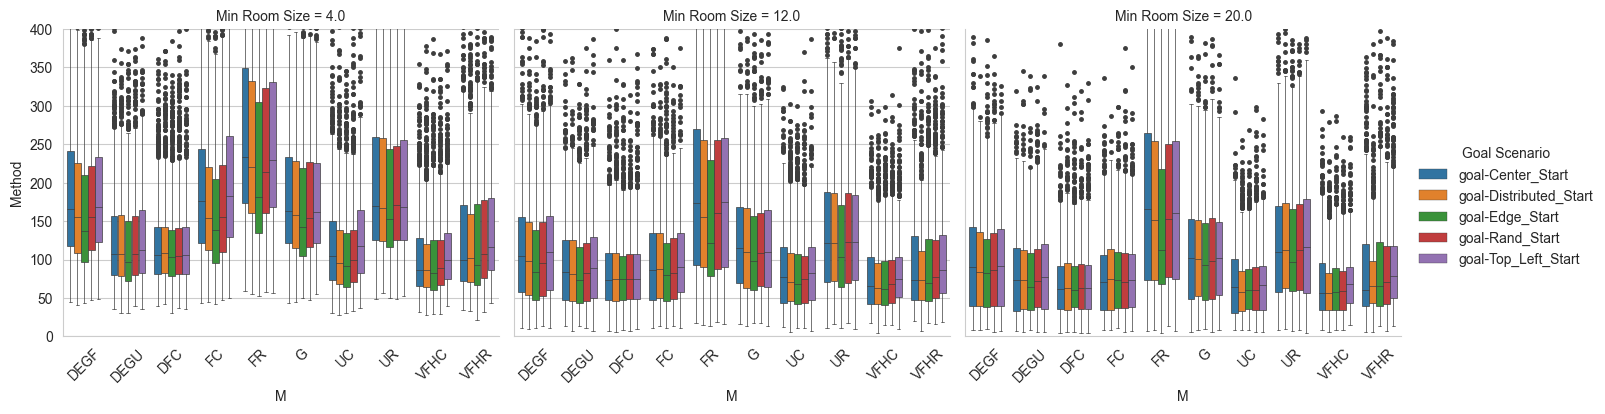

In [90]:
# grd = sns.catplot(
#     data=df_end_success, 
#     y="Frame Count", x="M", hue="Start Scenario", 
#     # col_wrap=3,
#     col="Min Room Size",
#     kind="box", 
#     # bw=.25, cut=0, 
#     flierprops={"marker": "."},

#     linewidth=0.5,
#     height=4, aspect=1.2, 
# )
# # set x range 
# grd.set(ylim=(0, 400))
# # set Y label
# grd.set_ylabels("Method")
# grd.set_xticklabels(rotation=45)

grd = sns.catplot(
    data=df_end_success, 
    y="Frame Count", x="M", hue="Goal Scenario", 
    # col_wrap=3,
    col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    flierprops={"marker": "."},

    linewidth=0.5,
    height=4, aspect=1.2, 
)
# set x range 
grd.set(ylim=(0, 400))
# set Y label
grd.set_ylabels("Method")

grd.set_xticklabels(rotation=45)
# plt.yticks(range(0, 310, 20))
plt.grid(axis='y')
# mkae the fige bigger
# grd.fig.set_size_inches(15, 6)
plt.savefig(f"boxplot_frame_count.png", dpi=300)

df_end_success

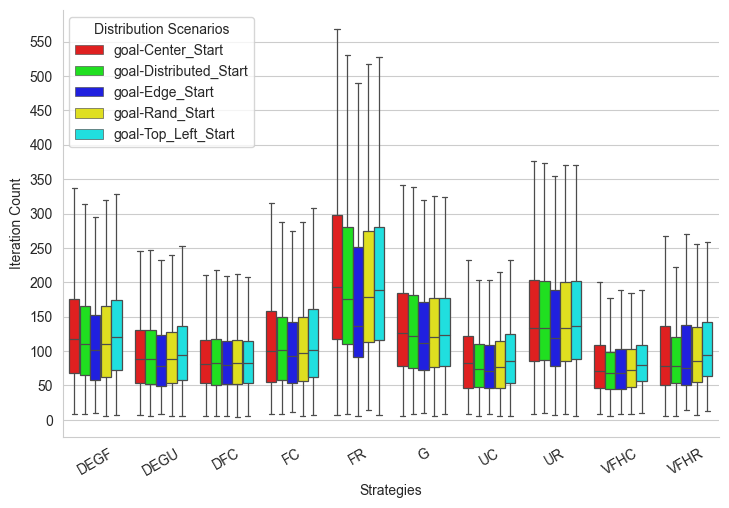

In [118]:
# set color pallete for 5 colors
sns.set_palette(sns.color_palette("colorblind", 5))




# df_end_success = df_end_success.replace(to_replace="Goal Scenario", value="Helloooo")
grd = sns.catplot(
    
    data=df_end_success, 
    y="Frame Count", x="M", hue="Goal Scenario", 
    # col_wrap=3,
    # col="Min Room Size",
    kind="box", 
    # bw=.25, cut=0, 
    # flierprops={"marker": "."},
    showfliers=False,
    
    
    linewidth=0.9,
    # height=4,
    aspect=1.5,
    palette= ["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#00FFFF"],
)
grd._legend.remove()

# move legend top left
plt.legend( loc='upper left', title='Distribution Scenarios')
# set x range 
# grd.set(ylim=(0, 310))
# set Y label
grd.set_ylabels("Iteration Count")
grd.set_xlabels("Strategies")

grd.set_xticklabels(rotation=30)
# plt.yticks(range(0, 310, 20))
plt.yticks(range(0, 600, 50))

# plt.grid(axis='y')
# plt.grid(color='gray', linestyle='dashed')
# need some cut before upload to overleaf
plt.savefig(f"distribution_vs_segmentation.png", bbox_inches='tight' ,dpi=300)
